#### Check Duplicate Records

#### Drop Duplicate Records

#### Check missing or null values

#### Drop missing or null values

#### Show top 10 average MSRP (Price) per car brand (rounded figure)?

#### Show the average MSRP (price) per years (rounded figure)?

#### Show average Engine HP (power) rounded figure and MPG (efficiency) rounded figure per year?

Hint: Average of (city mpg + highway MPG)

#### What percentage of cars are Compact, Midsize, or Large?

#### Which vehicle styles are the most sold (most common) in the dataset?

#### Which car brands have the most vehicles priced at $40,000 or more and with a popularity score of at least 1000?

#### Check if there are outliers in Engine HP show boxplot

#### Check if there are outliers in Engine Cylinder show boxplot

#### Find upper bound, lower bound, number of outliers in Engine HP

#### Fill missing values in Number of Doors column with median value then check if values are filled

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("cars.csv")

print("Original shape:", df.shape)



Original shape: (11914, 16)


In [5]:
# 1) Check duplicate records
dup_count = df.duplicated().sum()
print("\n1) Number of duplicate rows:", dup_count)          



1) Number of duplicate rows: 715


In [6]:
# 2) Drop duplicate records
df_nodup = df.drop_duplicates().copy()
print("   Shape after dropping duplicates:", df_nodup.shape) # (11199, 16)



   Shape after dropping duplicates: (11199, 16)


In [20]:
# 3) Check missing / null values
print("\n3) Missing values (after removing duplicates):")
print(df_nodup.isna().sum())



3) Missing values (after removing duplicates):
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [8]:
# 4) Drop rows with ANY missing / null values
df_clean = df_nodup.dropna().copy()
print("\n4) Shape after dropping all rows with any nulls:", df_clean.shape) # (7735, 16)




4) Shape after dropping all rows with any nulls: (7735, 16)


In [10]:
# 5) Top 10 average MSRP per car brand (rounded)
top10_avg_msrp = (
    df_clean
    .groupby("Make")["MSRP"]
    .mean()
    .round()
    .sort_values(ascending=False)
    .head(10)
)
print("\n5) Top 10 average MSRP per brand (rounded):")
print(top10_avg_msrp)


5) Top 10 average MSRP per brand (rounded):
Make
Bugatti         1757224.0
Maybach          546222.0
Rolls-Royce      351131.0
Lamborghini      331567.0
Bentley          247169.0
McLaren          239805.0
Ferrari          237384.0
Spyker           214990.0
Aston Martin     198123.0
Maserati         113684.0
Name: MSRP, dtype: float64


In [11]:
# 6) Average MSRP per year (rounded)
avg_msrp_year = (
    df_clean
    .groupby("Year")["MSRP"]
    .mean()
    .round()
    .sort_index()
)
print("\n6) Average MSRP per year (rounded):")
print(avg_msrp_year)


6) Average MSRP per year (rounded):
Year
1990     2073.0
1991     2223.0
1992     2192.0
1993     2401.0
1994     2726.0
1995     3270.0
1996     3140.0
1997     4524.0
1998     4434.0
1999     3612.0
2000     3913.0
2001    73833.0
2002    55704.0
2003    68312.0
2004    55908.0
2005    53724.0
2006    39001.0
2007    41173.0
2008    80462.0
2009    59193.0
2010    60152.0
2011    65663.0
2012    71837.0
2013    55201.0
2014    71196.0
2015    52613.0
2016    52580.0
2017    45333.0
Name: MSRP, dtype: float64


In [12]:
# 7) Average Engine HP and MPG efficiency per year
# Hint: efficiency = average of (city mpg + highway MPG)
df_clean = df_clean.assign(
    efficiency_mpg=(df_clean["city mpg"] + df_clean["highway MPG"]) / 2
)
avg_hp_eff_year = (
    df_clean
    .groupby("Year")
    .agg(
        avg_engine_hp=("Engine HP", "mean"),
        avg_eff_mpg=("efficiency_mpg", "mean")
    )
    .round()
    .sort_index()
)
print("\n7) Average Engine HP and efficiency (mpg) per year (rounded):")
print(avg_hp_eff_year)


7) Average Engine HP and efficiency (mpg) per year (rounded):
      avg_engine_hp  avg_eff_mpg
Year                            
1990          154.0         21.0
1991          163.0         21.0
1992          155.0         22.0
1993          174.0         21.0
1994          167.0         21.0
1995          203.0         20.0
1996          201.0         21.0
1997          200.0         21.0
1998          224.0         20.0
1999          199.0         21.0
2000          202.0         21.0
2001          243.0         20.0
2002          244.0         19.0
2003          258.0         19.0
2004          260.0         19.0
2005          255.0         20.0
2006          248.0         20.0
2007          274.0         18.0
2008          298.0         19.0
2009          268.0         20.0
2010          269.0         20.0
2011          280.0         22.0
2012          293.0         22.0
2013          290.0         23.0
2014          311.0         23.0
2015          288.0         24.0
2016         

In [13]:
# 8) What percentage of cars are Compact, Midsize, or Large?
size_counts = df_clean["Vehicle Size"].value_counts()
total_cars = len(df_clean)
pct_comp_mid_large = (
    (size_counts.get("Compact", 0) +
     size_counts.get("Midsize", 0) +
     size_counts.get("Large", 0))
    / total_cars * 100
)

print("\n8) Vehicle Size counts (after cleaning):")
print(size_counts)
print(f"\n   Percentage of cars that are Compact/Midsize/Large: {pct_comp_mid_large:.2f}%")
# Here it's 100% (all cars are one of these three).
print("   Breakdown:")
print((size_counts / total_cars * 100).round(2))


8) Vehicle Size counts (after cleaning):
Vehicle Size
Midsize    3043
Compact    2847
Large      1845
Name: count, dtype: int64

   Percentage of cars that are Compact/Midsize/Large: 100.00%
   Breakdown:
Vehicle Size
Midsize    39.34
Compact    36.81
Large      23.85
Name: count, dtype: float64


In [14]:
# 9) Most common vehicle styles
style_counts = df_clean["Vehicle Style"].value_counts()
print("\n9) Most common vehicle styles (top 10):")
print(style_counts.head(10))
# Most common: 4dr SUV, then Sedan, Coupe, Convertible, ...

# 10) Brands with most vehicles priced >= 40,000 and popularity >= 1000
filtered = df_clean[(df_clean["MSRP"] >= 40000) & (df_clean["Popularity"] >= 1000)]
brand_counts_filtered = filtered["Make"].value_counts()
print("\n10) Brands with vehicles priced >= 40,000 and Popularity >= 1000:")
print(brand_counts_filtered.head(10))


9) Most common vehicle styles (top 10):
Vehicle Style
4dr SUV                2053
Sedan                  1801
Coupe                   922
Convertible             645
4dr Hatchback           639
2dr Hatchback           409
Wagon                   349
Crew Cab Pickup         334
Extended Cab Pickup     187
Regular Cab Pickup      176
Name: count, dtype: int64

10) Brands with vehicles priced >= 40,000 and Popularity >= 1000:
Make
Cadillac       354
BMW            269
Audi           224
Chevrolet      171
Porsche        123
Ford           105
Nissan          69
Ferrari         68
Lamborghini     52
Toyota          50
Name: count, dtype: int64


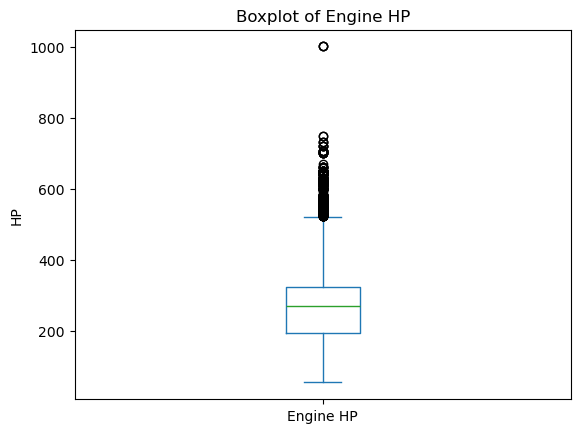

In [15]:
# 11) Check outliers in Engine HP – boxplot
plt.figure()
df_clean["Engine HP"].plot(kind="box")
plt.title("Boxplot of Engine HP")
plt.ylabel("HP")
plt.show()

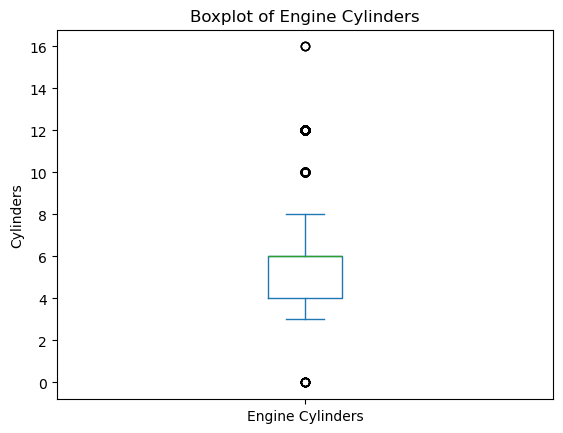

In [16]:
# 12) Check outliers in Engine Cylinders – boxplot
plt.figure()
df_clean["Engine Cylinders"].plot(kind="box")
plt.title("Boxplot of Engine Cylinders")
plt.ylabel("Cylinders")
plt.show()

In [18]:
# 13) Find upper bound, lower bound, number of outliers in Engine HP (IQR method)
hp = df_clean["Engine HP"]
q1 = hp.quantile(0.25)
q3 = hp.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_hp = hp[(hp < lower_bound) | (hp > upper_bound)]

print("\n13) Engine HP outlier analysis (IQR method):")
print(f"    Q1: {q1:.2f}")
print(f"    Q3: {q3:.2f}")
print(f"    IQR: {iqr:.2f}")
print(f"    Lower bound: {lower_bound:.2f}")
print(f"    Upper bound: {upper_bound:.2f}")
print(f"    Number of outliers in Engine HP: {len(outliers_hp)}")
# Lower ~ -2.50, upper ~ 521.50, outliers: 381



13) Engine HP outlier analysis (IQR method):
    Q1: 194.00
    Q3: 325.00
    IQR: 131.00
    Lower bound: -2.50
    Upper bound: 521.50
    Number of outliers in Engine HP: 381


In [19]:
# 14) Fill missing Number of Doors with median and check
median_doors = df_nodup["Number of Doors"].median()
df_doors_filled = df_nodup.copy()
df_doors_filled["Number of Doors"] = df_doors_filled["Number of Doors"].fillna(median_doors)

print("\n14) After filling Number of Doors with median:")
print("    Median used:", median_doors)           # 4.0
print("    Remaining missing in Number of Doors:",
      df_doors_filled["Number of Doors"].isna().sum())  # 0
print("    Unique values in Number of Doors:",
      df_doors_filled["Number of Doors"].unique())


14) After filling Number of Doors with median:
    Median used: 4.0
    Remaining missing in Number of Doors: 0
    Unique values in Number of Doors: [2. 4. 3.]
